In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

**DATA CLEANING**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
4124,ham,May b approve panalam...but it should have mor...
4599,ham,Hi did u decide wot 2 get 4 his bday if not il...
2103,ham,Its a site to simulate the test. It just gives...
176,ham,U still going to the mall?
161,ham,New car and house for my parents.:)i have only...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
display(df['target'].value_counts())
display(df.head())


target
0    4825
1     747
Name: count, dtype: int64

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing(null) values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#duplicates
df.duplicated().sum()
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

**EDA**

In [15]:
import matplotlib.pyplot as plt

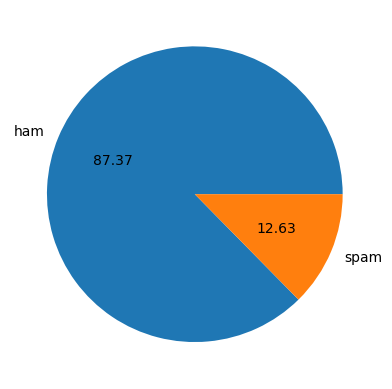

In [16]:
#pie chart
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

Data is imbalanced

In [17]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gauravhirani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/gauravhirani/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
#finding no of characters
df['num_characters'] = df['text'].apply(len)

In [19]:
#finding no of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
#finding no of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [22]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
#describe
df[['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#describe only for ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#describe only for spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

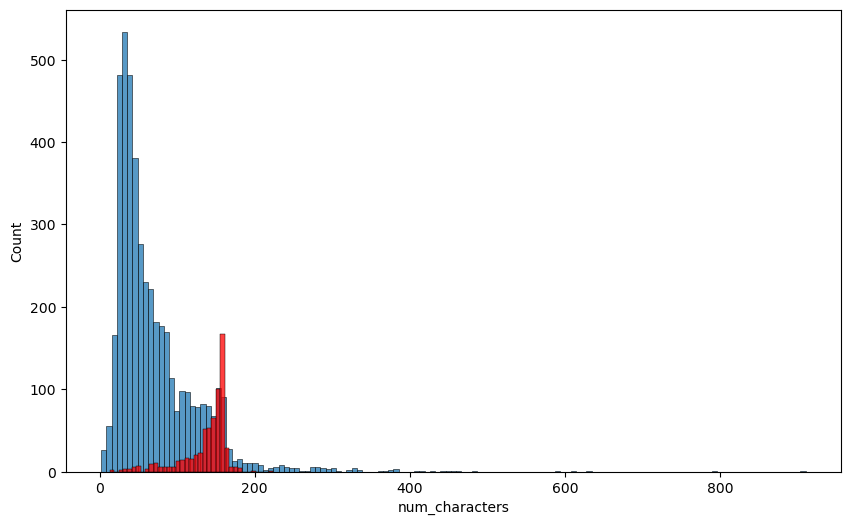

In [27]:
#hist plot between ham and spam
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

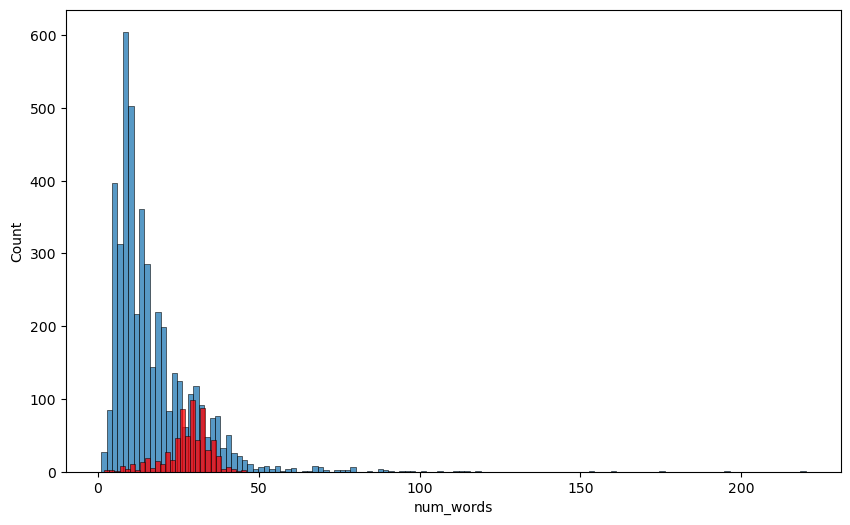

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

/Users/gauravhirani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


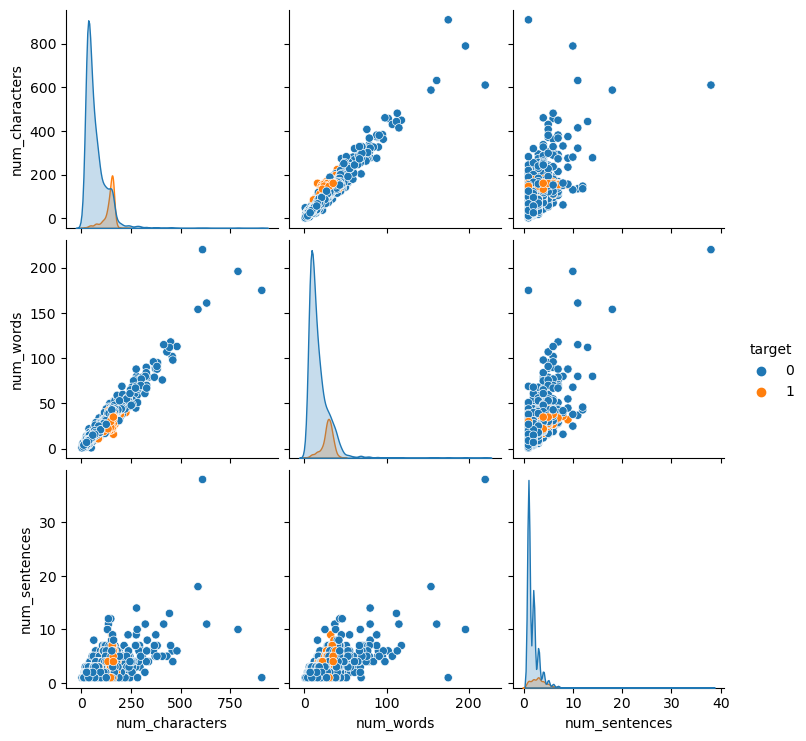

In [29]:
sns.pairplot(df, hue='target')

<Axes: >

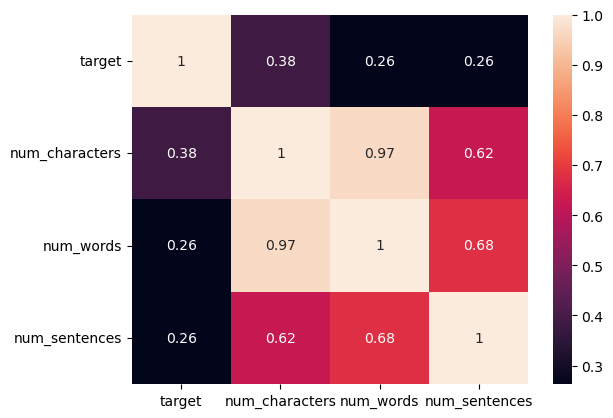

In [30]:
numerical_df = df[['target', 'num_characters', 'num_words', 'num_sentences']]
sns.heatmap(numerical_df.corr(), annot=True)

Data Preprocessing
- lower case
- tokenization
- removing special characters
- removing stop words and puntuation
- stemming

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gauravhirani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
  text = text.lower() #lowercasing all characters
  text = nltk.word_tokenize(text) #tokenization
  #removing special characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  #removing stopwords and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  #stemming
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

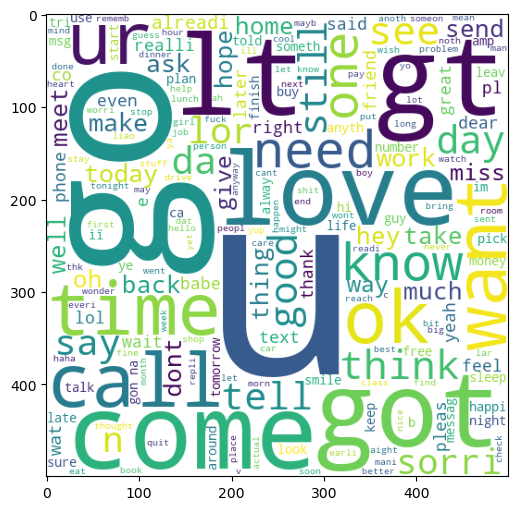

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

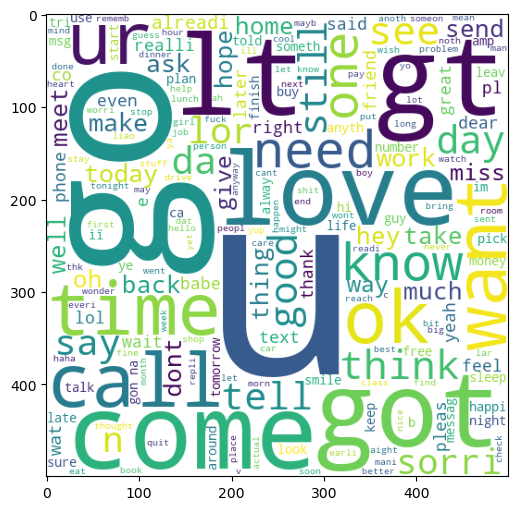

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [41]:
#finding top 50 words in spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

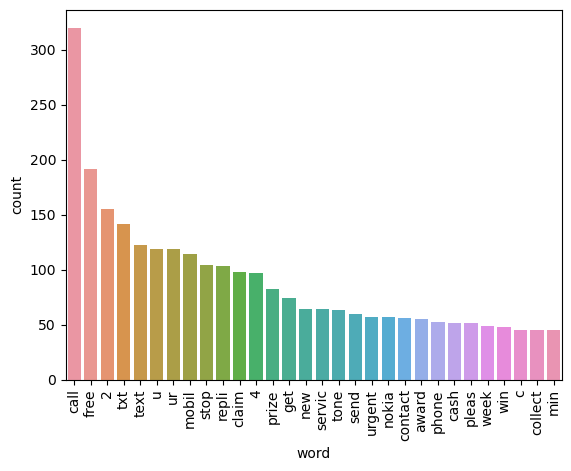

In [42]:
from collections import Counter
top_spam_words = Counter(spam_corpus).most_common(30)
df_top_spam_words = pd.DataFrame(top_spam_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_top_spam_words)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
#finding top 30 words in spam messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

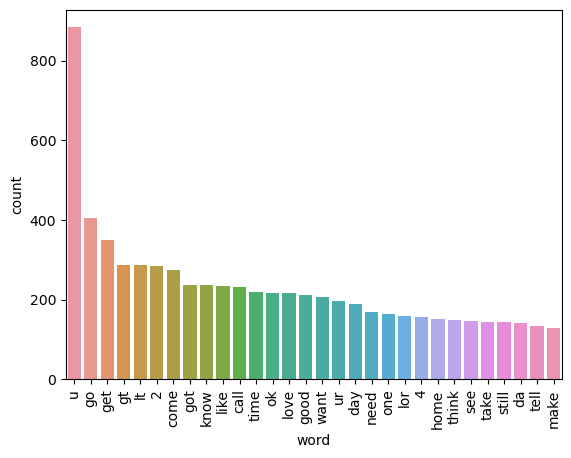

In [44]:
from collections import Counter
top_ham_words = Counter(ham_corpus).most_common(30)
df_top_ham_words = pd.DataFrame(top_ham_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_top_ham_words)
plt.xticks(rotation='vertical')
plt.show()

**Model Building**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [46]:
X = cv.fit_transform(df['transformed_text']).toarray()
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
y = df['target'].values

In [48]:
from sklearn.model_selection import train_test_split

**Models Using CountVectorizer**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [50]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [53]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [54]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


**Models Using Tfidf Vectorizer**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size= 0.2, random_state=42)

In [56]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [57]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [58]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


**Other Models**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

**Models**

In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [61]:
#dictionaries of all models mapped to their objects
models = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [62]:
def train_test_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [63]:
accuracy_scores = []
precision_scores = []
for name,model in models.items():
  accuracy, precision = train_test_model(model, X_train, X_test, y_train, y_test)
  print(f'{name} accuracy is {accuracy}')
  print(f'{name} precision is {precision}')
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)

SVC accuracy is 0.971953578336557
SVC precision is 0.9393939393939394
KN accuracy is 0.8965183752417795
KN precision is 1.0
DT accuracy is 0.9352030947775629
DT precision is 0.8145161290322581
LR accuracy is 0.9439071566731141
LR precision is 0.865546218487395
RF accuracy is 0.9700193423597679
RF precision is 0.9913793103448276
AdaBoost accuracy is 0.9477756286266924
AdaBoost precision is 0.8421052631578947
BgC accuracy is 0.9613152804642167
BgC precision is 0.8776978417266187
ETC accuracy is 0.9738878143133463
ETC precision is 0.9916666666666667
GBDT accuracy is 0.9506769825918762
GBDT precision is 0.9519230769230769
xgb accuracy is 0.9748549323017408
xgb precision is 0.9612403100775194


In [64]:
performance_df = pd.DataFrame({'models': models.keys(), 'accuracy': accuracy_scores, 'precision': precision_scores})

In [65]:
#sort performace dataFrame on basis od accuracy
performance_df = performance_df.sort_values(by=['precision'], ascending=False)
performance_df

,models,accuracy,precision
1,KN,0.896518,1.000000
7,ETC,0.973888,0.991667
4,RF,0.970019,0.991379
9,xgb,0.974855,0.961240
8,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
6,BgC,0.961315,0.877698
3,LR,0.943907,0.865546
5,AdaBoost,0.947776,0.842105
2,DT,0.935203,0.814516
